<a href="https://colab.research.google.com/github/caiociardelli/sphglltools/blob/main/doc/7_Generic_interpolation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Generic interpolation

Author: Caio Ciardelli
<br>
<br>
If you use this Jupyter, please, cite the following paper:
<br>
<br>
Ciardelli, C., Bozdağ, E., Peter, D., and van der Lee, S., 2021. SphGLLTools: A toolbox for visualization of large seismic model files based on 3D spectral-element meshes. Computer & Geosciences. https://doi.org/10.1016/j.cageo.2021.105007.
<br>
<br>

####1D interpolation

*Lagrange polynomials* are an elegant way of explaining polynomial interpolation. However, relatively often, the conditions required for their application, such as linearly independent coordinates, are not met. In those cases, a more generic approach like matrix inversion is needed.
<br>
<br>
Given a set of distinct $n\,+\,1$ data points in $\mathbb{R}^{2}\,(x_0,\,y_0),\,(x_1,\,y_1)\dots(x_n,\,y_n)$, there is one and only one polynomial of degree $n$ that contains all the points:
<br>
<br>
\begin{equation}
  P\,(x)
  \,=\,\sum_{i\,=\,0}^{n} a_i\,x^i
  \,=\,a_0\,+\,a_1\,x\,+\,a_2\,x^2
  \,+\,\dots\,+\,a_{n\,-\,1}\,x^{n\,-\,1}\,+\,a_n\,x^n,
\end{equation}
<br>
<br>
where
<br>
<br>
\begin{split}
  P\,(x_0)
  \,&=\,a_0\,+\,a_1\,x_0\,+\,a_2\,{x_0}^2
  \,+\,\dots\,+\,a_{n\,-\,1}\,{x_0}^{n\,-\,1}\,+\,a_n\,{x_0}^n
  \,=\,y_0\\
  P\,(x_1)
  \,&=\,a_1\,+\,a_1\,x_1\,+\,a_2\,{x_1}^2
  \,+\,\dots\,+\,a_{n\,-\,1}\,{x_1}^{n\,-\,1}\,+\,a_n\,{x_1}^n
  \,=\,y_1\\
  P\,(x_2)
  \,&=\,a_1\,+\,a_1\,x_2\,+\,a_2\,{x_2}^2
  \,+\,\dots\,+\,a_{n\,-\,1}\,{x_2}^{n\,-\,1}\,+\,a_n\,{x_2}^n
  \,=\,y_2\\
  \vdots\\
  P\,(x_{n\,-\,1})
  \,&=\,a_1\,+\,a_1\,x_{n\,-\,1}\,+\,a_2\,{x_{n\,-\,1}}^2
  \,+\,\dots\,+\,a_{n\,-\,1}\,{x_{n\,-\,1}}^{n\,-\,1}\,+\,a_n\,{x_{n\,-\,1}}^n
  \,=\,y_{n\,-\,1}\\
  P\,(x_n)
  \,&=\,a_1\,+\,a_1\,x_n\,+\,a_2\,{x_n}^2
  \,+\,\dots\,+\,a_n\,{x_n}^n\,+\,a_n\,{x_n}^n
  \,=\,y_n
\end{split}
<br>
<br>
We can express this linear system of equations in matrix notation as:
<br>
<br>
\begin{equation}
  \underbrace
  {
    \begin{bmatrix}
      1 & x_0 & {x_0}^2 & \dots  & {x_0}^{n\,-\,1} & {x_0}^n\\
      1 & x_1 & {x_1}^2 & \dots  & {x_1}^{n\,-\,1} & {x_1}^n\\
      1 & x_2 & {x_2}^2 & \dots  & {x_2}^{n\,-\,1} & {x_2}^n\\
      \vdots & \vdots & \vdots & \ddots & \vdots & \vdots\\
      1 & x_{n\,-\,1} & {x_{n\,-\,1}}^2 & \dots  & {x_{n\,-\,1}}^{n\,-\,1} & {x_{n\,-\,1}}^n\\
      1 & x_n & {x_n}^2 & \dots  & {x_n}^{n\,-\,1} & {x_n}^n 
    \end{bmatrix}
  }_{\displaystyle M}
  .
  \underbrace
  {
    \begin{bmatrix}
      a_0\\
      a_1\\
      a_2\\
      \vdots\\
      a_{n\,-\,1}\\
      a_n
     \end{bmatrix}
  }_{\displaystyle a}
  \,=\,
  \underbrace
  {
    \begin{bmatrix}
      y_0\\
      y_1\\
      y_2\\
      \vdots\\
      y_{n\,-\,1}\\
      y_n
    \end{bmatrix}
  }_{\displaystyle v}
\end{equation}
<br>
<br>
Multiplying both members of the above equation by the inverse of $M$ gives:
<br>
<br>
\begin{equation}
  \underbrace
  {
    M^{-1}M
  }_{\displaystyle I}
  \,a
  \,=\,M^{-1}\,v
  \,\implies\,
  a
  \,=\,M^{-1}\,v
\end{equation}
<br>
<br>

In [ ]:
def cN (x, n):
  """
  Returns x to the power of n
  """
  return x ** n


def coefficients1D (xn, yn):
  """
  Computes coefficients from the
  data points
  """
  n = xn.size

  M = np.matrix (np.zeros ((n, n)))
  v = np.matrix (np.reshape (yn, (n, 1)))

  for i in range (n):

    for j in range (n):

      M[i, j] = cN (xn[i], j)

  return np.array (np.linalg.solve (M, v)).flatten ()


def polyIntp1D (x, a):
  """
  Returns the interpolated value at x
  """
  p = np.zeros (x.size)

  for i in range (a.size):

    p += a[i] * cN (x, i)

  return p

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Set the parameters below

# N: number of points

# xn: nodes x values
# yn: nodes y values

if __name__ == "__main__":

  N = 1000

  xn = np.array ([0.0, 1.0, 2.0, 3.0, 4.0])
  yn = np.array ([3.1, 1.7, 2.5, 2.9, 2.6])

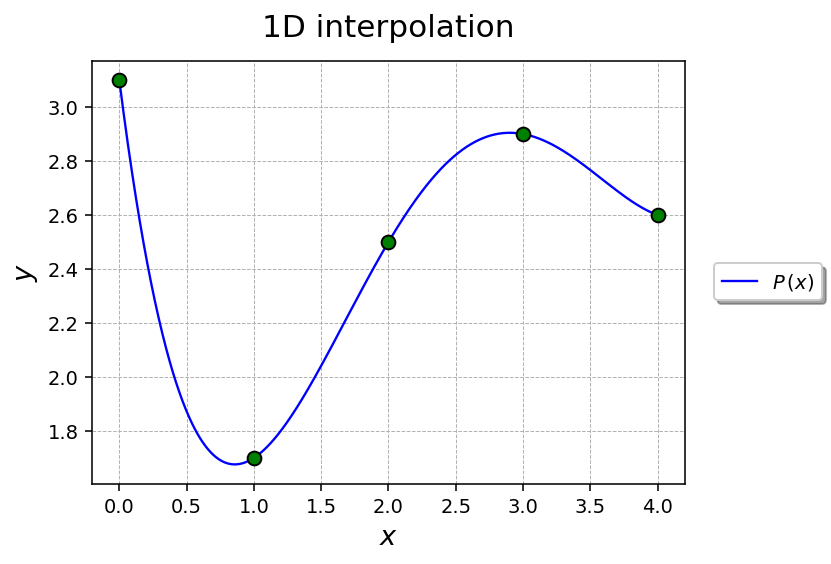

In [ ]:
if __name__ == "__main__":

  x = np.linspace (xn[0], xn[-1], N)

  a = coefficients1D (xn, yn)
  P = polyIntp1D (x, a)

  fig = plt.figure (figsize = (6, 4), dpi = 140)

  plt.plot (x, P, color = 'blue', linewidth = 1.2, label = r'$P\,(x)$')
  plt.scatter (xn, yn, marker = 'o', s = 50, facecolor = 'green',
               edgecolor = 'black', linewidth = 1, zorder = 3)
  plt.xlabel (r'$x$', fontsize = 14)
  plt.ylabel (r'$y$', fontsize = 14)
  plt.tick_params (axis = 'x', labelsize = 10)
  plt.tick_params (axis = 'y', labelsize = 10)
  fig.legend (loc = 'center right', shadow = True, framealpha = 1.0,
              handlelength = 1.8, fontsize = 10)
  plt.grid (linestyle = 'dashed', linewidth = 0.5)
  plt.title ('1D interpolation', fontsize = 16, y = 1.03)

  plt.subplots_adjust (right = 0.83)

  plt.show ()

####2D interpolation

Given a set of $(m\,+\,1)(n\,+\,1)$ points in $\mathbb{R}^{3}\,(x_{00},\,y_{00},\,z_{00}),\,(x_{01},\,y_{01},\,z_{01})...(x_{m\,-\,1n},\,y_{m\,-\,1n},\,z_{m\,-\,1n})\,(x_{mn},\,y_{mn},\,z_{mn})$ there is one and only one 2D polynomial surface that crosses all points in the following form:
<br>
<br>
\begin{split}
  P\,(x,\,y)
  \,=\,\sum_{i\,=\,0}^{m}\sum_{j\,=\,0}^{n} a_{ij}\,x^i\,y^j
  &\,=\,a_{00}\\
  &\,+\,a_{10}\,x\,+\,a_{01}\,y\\
  &\,+\,a_{11}\,x\,y\,+\,a_{20}\,x^2\,+\,a_{02}\,y^2\\
  &\,+\,a_{21}\,x^2\,y\,+\,a_{12}\,x\,y^2\,+\,a_{30}\,x^3\,+\,a_{03}\,y^3\\
  \vdots\\
  &\,+\,a_{m\,n\,-\,2}\,x^m\,y^{n\,-\,2}\,+\,a_{m\,-\,1\,n\,-\,1}\,x^{m\,-\,1}\,y^{n\,-\,1}\,+\,a_{m\,-\,2\,n}\,x^{m\,-\,2}\,y^n\\
  &\,+\,a_{m\,n\,-\,1}\,x^m\,y^{n\,-\,1}\,+\,a_{m\,-\,1\,n}\,x^{m\,-\,1}\,y^n\\
  &\,+\,a_{m\,n}\,x^m\,y^n
\end{split}
<br>
<br>
Just like in 1D case, this results in a linear system of equations which we express in matrix notation as:
<br>
<br>
\begin{equation}
  \underbrace
  {
    \begin{bmatrix}
      1 & x_{00} & {x_{00}}^2 & \dots & {x_{00}}^m\,{y_{00}}^{n\,-\,1} & {x_{00}}^m\,{y_{00}}^n\\
      1 & x_{10} & {x_{10}}^2 & \dots  & {x_{10}}^m\,{y_{10}}^{n\,-\,1} & {x_{10}}^m\,{y_{10}}^n\\
      1 & x_{20} & {x_{20}}^2 & \dots  & {x_{20}}^m\,{y_{20}}^{n\,-\,1} & {x_{20}}^m\,{y_{20}}^n\\
      \vdots & \vdots & \vdots & \ddots & \vdots & \vdots \\
      1 & x_{mn\,-\,1} & {x_{mn\,-\,1}}^2 & \dots  & {x_{mn\,-\,1}}^m\,{y_{mn\,-\,1}}^{n\,-\,1} & {x_{mn\,-\,1}}^m\,{y_{mn\,-\,1}}^n\\
      1 & x_{mn} & {x_{mn}}^2 & \dots  & {x_{mn}}^m\,{y_{mn}}^{n\,-\,1} & {x_{mn}}^m\,{y_{mn}}^n
    \end{bmatrix}
  }_{\displaystyle M}
  .
  \underbrace
  {
    \begin{bmatrix}
      a_{00}\\
      a_{10}\\
      a_{20}\\
      \vdots\\
      a_{m\,n\,-\,1}\\
      a_{mn} 
     \end{bmatrix}
  }_{\displaystyle a}
  \,=\,
  \underbrace
  {
    \begin{bmatrix}
      z_{00}\\
      z_{10}\\
      z_{20}\\
      \vdots\\
      z_{m\,n\,-\,1}\\
      z_{mn}
    \end{bmatrix}
  }_{\displaystyle v}
\end{equation}
<br>
<br>
For which the solution, once again is given by:
<br>
<br>
\begin{equation}
  a
  \,=\,M^{-1}\,v
\end{equation}
<br>
<br>

In [ ]:
def cMN (x, y, m, n):
  """
  Returns x to the power of m
  times y to the power of n
  """
  return x ** m * y ** n


def coefficients2D (Xn, Yn, Zn):
  """
  Compute coefficients from the
  data points
  """
  m, n = Zn.shape

  mn = m * n

  M = np.matrix (np.empty ((mn, mn)))
  v = np.matrix (np.reshape (Zn, (mn, 1)))

  r = 0

  for i in range (m):

    for j in range (n):

      c = 0

      for ej in range (n):

        for ei in range (m):

          M[r, c] = cMN (Xn[i, j], Yn[i, j], ei, ej)

          c += 1
      
      r += 1

  return np.array (np.linalg.solve (M, v)).flatten ()


def polyIntp2D (xx, yy, m, n, a):
  """
  Returns the interpolated value at x and y
  """
  Nx, Ny = xx.shape

  zz = np.zeros ((Nx, Ny))

  r = 0

  for j in range (n):

    for i in range (m):

      zz += a[r] * cMN (xx, yy, i, j)

      r += 1

  return zz

In [ ]:
# Set the parameters below

# Nx: number of points in the x direction
# Ny: number of points in the y direction

# Xn: nodes x values for all (x, y) combinations
# Yn: nodes y values for all (x, y) combinations
# Zn: nodes z values for all (x, y) combinations

if __name__ == "__main__":

  Nx = 200
  Ny = 200

  Xn = np.array ([[0.00, 1.05, 1.95, 3.00, 4.05],
                  [0.05, 1.00, 2.05, 3.05, 4.05],
                  [0.00, 1.05, 2.00, 3.00, 4.05],
                  [0.05, 1.00, 1.95, 3.05, 4.00],
                  [0.05, 0.95, 2.00, 3.05, 3.95]])

  Yn = np.array ([[2.95, 3.00, 3.05, 3.00, 3.05],
                  [4.00, 4.05, 4.05, 4.05, 4.00],
                  [5.00, 4.95, 4.95, 5.00, 5.05],
                  [6.00, 6.05, 6.00, 5.95, 5.95],
                  [7.05, 7.05, 7.00, 6.95, 7.00]])

  Zn = np.array ([[3.1, 1.7, 2.5, 2.9, 2.6],
                  [2.8, 1.9, 2.1, 2.7, 2.6],
                  [2.5, 2.3, 2.2, 2.7, 2.9],
                  [2.2, 2.6, 2.5, 2.4, 3.1],
                  [2.0, 2.7, 3.1, 2.0, 3.0]])

In [ ]:
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

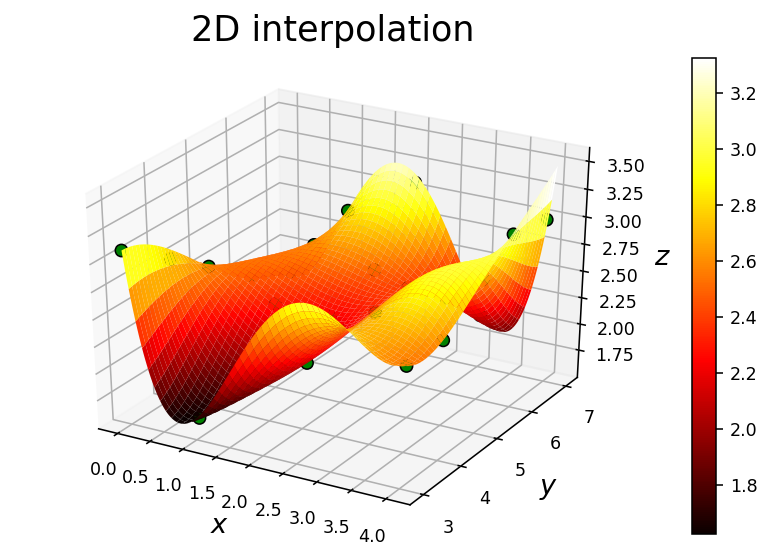

In [ ]:
if __name__ == "__main__":

  xmin = min (Xn.ravel ())
  xmax = max (Xn.ravel ())
  ymin = min (Yn.ravel ())
  ymax = max (Yn.ravel ())

  x = np.linspace (xmin, xmax, Nx)
  y = np.linspace (ymin, ymax, Ny)

  xx, yy = np.meshgrid (x, y)
  
  a  = coefficients2D (Xn, Yn, Zn)
  zz = polyIntp2D (xx, yy, xn.size, yn.size, a)

  fig = plt.figure (figsize = (6, 4), dpi = 140)
  ax = fig.add_subplot (projection = '3d')

  surf = ax.plot_surface (xx, yy, zz, cmap = cm.hot, zorder = 1)

  ax.scatter (Xn, Yn, Zn, marker = 'o', s = 40,
              facecolor = 'green', edgecolor = 'black',
              linewidth = 0.8, alpha = 1, zorder = 2)

  ax.set_xlabel (r'$x$', fontsize = 14)
  ax.set_ylabel (r'$y$', fontsize = 14)
  ax.set_zlabel (r'$z$', fontsize = 14)
  plt.tick_params (axis = 'x', labelsize = 9)
  plt.tick_params (axis = 'y', labelsize = 9)
  plt.tick_params (axis = 'z', labelsize = 9)
  plt.rcParams['grid.linewidth'] = 0.3
  plt.rcParams['grid.linestyle'] = 'dashed'
  plt.title ('2D interpolation', fontsize = 18, y = 1.1)
  cbar = plt.colorbar (surf)
  cbar.ax.tick_params (labelsize = 9)

  plt.subplots_adjust (left = 0.05, bottom = 0.05, top = 0.9, right = 1.0)

  plt.show ()


The same idea can be generalized to any number of dimensions for interpolating a set of data points in $\mathbb{R}^{n}$.
<br>
<br>

####References

“Bicubic interpolation.” *Wikipedia*, Wikimedia Foundation, 26 Apr. 2020, https://en.wikipedia.org/wiki/Bicubic_interpolation [Accessed 5 August 2020].
<br>
<br>
“Bilinear interpolation.” *Wikipedia*, Wikimedia Foundation, 18 May 2020, https://en.wikipedia.org/wiki/Bilinear_interpolation [Accessed 5 August 2020].
<br>
<br>
“Polynomial interpolation.” *Wikipedia*, Wikimedia Foundation, 26 Jun. 2020, https://en.wikipedia.org/wiki/Polynomial_interpolation [Accessed 5 August 2020].